In [79]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

In [136]:
resize_shape = (150, 150)
healthy_im = cv2.imread('./data/masked_images/masked_0.jpg', 0)
healthy_im = cv2.resize(healthy_im, resize_shape)

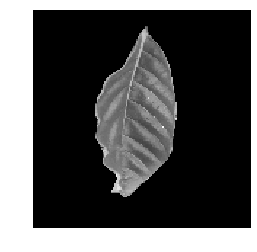

In [142]:
plt.gray()
plt.axis('off')
plt.imshow(healthy_im);

In [206]:
unhealthy_im = cv2.imread('./data/masked_images/masked_4.jpg', 0)
unhealthy_im = cv2.resize(unhealthy_im, resize_shape)

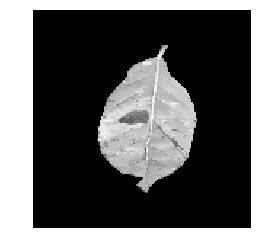

In [207]:
plt.gray()
plt.axis('off')
plt.imshow(unhealthy_im);

In [208]:
def apply_convolution(i, im_filter):
    i_transformed = np.copy(i)
    for x in range(1,resize_shape[0]-1):
      for y in range(1,resize_shape[1]-1):
          convolution = 0.0
          convolution = convolution + (i[x - 1, y-1] * im_filter[0][0])
          convolution = convolution + (i[x, y-1] * im_filter[0][1])
          convolution = convolution + (i[x + 1, y-1] * im_filter[0][2])
          convolution = convolution + (i[x-1, y] * im_filter[1][0])
          convolution = convolution + (i[x, y] * im_filter[1][1])
          convolution = convolution + (i[x+1, y] * im_filter[1][2])
          convolution = convolution + (i[x-1, y+1] * im_filter[2][0])
          convolution = convolution + (i[x, y+1] * im_filter[2][1])
          convolution = convolution + (i[x+1, y+1] * im_filter[2][2])
          #convolution = convolution * weight
          if(convolution<0):
            convolution=0
          if(convolution>255):
            convolution=255
          i_transformed[x, y] = convolution
    return i_transformed

In [210]:
def show_convolution(healthy_im, unhealthy_im, im_filter):
    healthy_conv = apply_convolution(healthy_im, im_filter)
    display(Image.fromarray(healthy_conv));
    unhealthy_conv = apply_convolution(unhealthy_im, im_filter)
    display(Image.fromarray(unhealthy_conv));
    return healthy_conv, unhealthy_conv

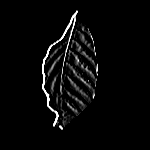

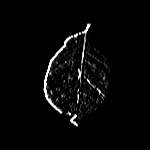

In [211]:
# Sobel Edge
im_filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
conv = show_convolution(healthy_im, unhealthy_im, im_filter)

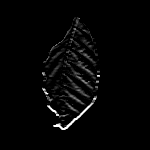

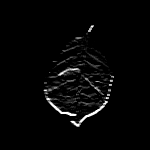

In [212]:
# Horizontal Lines
im_filter = [[1, 0, -1], 
             [1, 0, -1], 
             [1, 0, -1]]
conv = show_convolution(healthy_im, unhealthy_im, im_filter)

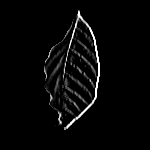

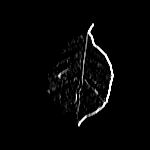

In [213]:
# Vertical lines
im_filter = [[1, 1, 1], 
             [0, 0, 0], 
             [-1, -1, -1]]
conv = show_convolution(healthy_im, unhealthy_im, im_filter)

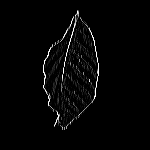

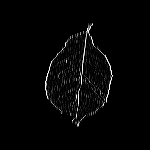

In [214]:
# Vertical lines
im_filter = [[-1, -1, -1], 
             [2, 2, 2], 
             [-1, -1, -1]]
conv = show_convolution(healthy_im, unhealthy_im, im_filter)

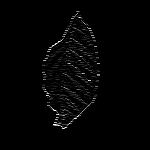

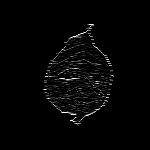

In [215]:
# Horizontal lines
im_filter = np.transpose(im_filter)
conv = show_convolution(healthy_im, unhealthy_im, im_filter)

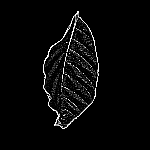

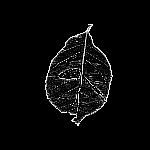

In [216]:
# Edge detection
im_filter = [[-1, -1, -1], 
             [-1, 8, -1], 
             [-1, -1, -1]]
conv = show_convolution(healthy_im, unhealthy_im, im_filter)

## Pooling

In [217]:
def apply_pooling(image):
    new_x = int(resize_shape[0]/2)
    new_y = int(resize_shape[1]/2)
    newImage = np.zeros((new_x, new_y))
    for x in range(0, resize_shape[0], 2):
      for y in range(0, resize_shape[1], 2):
        pixels = []
        pixels.append(image[x, y])
        pixels.append(image[x+1, y])
        pixels.append(image[x, y+1])
        pixels.append(image[x+1, y+1])
        newImage[int(x/2),int(y/2)] = max(pixels)
    return newImage

In [218]:
def show_pooling(healthy_im, unhealthy_im):
    healthy_pooling = apply_pooling(healthy_im)
    display(Image.fromarray(healthy_pooling).convert('L'));
    unhealthy_pooling = apply_pooling(unhealthy_im)
    display(Image.fromarray(unhealthy_pooling).convert('L'));
    return healthy_pooling, unhealthy_pooling

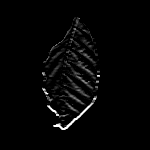

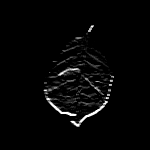

In [219]:
# Horizontal Lines
im_filter = [[1, 0, -1], 
             [1, 0, -1], 
             [1, 0, -1]]
healthy_conv, unhealthy_conv = show_convolution(healthy_im, unhealthy_im, im_filter)

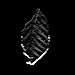

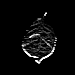

In [221]:
# Pooling reduces size by half. Now 75*75
healthy_pooling, unhealthy_pooling = show_pooling(healthy_conv, unhealthy_conv)

### Second convolution and pooling layer